# EDA Assignment WIP

## Setup and Import

As always, the first step is to import the required libraries and data. Since we do not want to run the SQL query every time, we can simply import the csv file we created in the first notebook.

In [1]:
# Import packages
import pandas as pd # to read sql data into a pandas dataframe
import psycopg2 # to connect to SQL database
import os # provides functions for interacting with operating system
from dotenv import load_dotenv # reads key-value pairs from a .env file and can set them as environment variables

load_dotenv() # takes environment variables from .env

DATABASE = os.getenv('DATABASE')
USER_DB = os.getenv('USER_DB')
PASSWORD = os.getenv('PASSWORD')
HOST = os.getenv('HOST')
PORT = os.getenv('PORT')


# Open connection 
conn = psycopg2.connect(
    database=DATABASE,
    user=USER_DB,
    password=PASSWORD,
    host=HOST,
    port=PORT
)

# import the data into a pandas dataframe
query_string = "SELECT kchd.*, kchs."'date'", kchs.price FROM eda.king_county_house_details kchd LEFT JOIN eda.king_county_house_sales kchs ON kchd.id = kchs.house_id" # define SQL query

In [2]:
# Import dataframe
df_eda = pd.read_sql(query_string, conn) # read queried data from SQL database into pandas dataframe

/var/folders/mv/6m38j0cs28b4zwc_3g6h8jkh0000gn/T/ipykernel_58092/157024126.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_eda = pd.read_sql(query_string, conn) # read queried data from SQL database into pandas dataframe


## Getting to Know the Data

Before you can start visualizing, you should get an overview of the data. Is the format of the data suitable for visualization or do you need to adjust something here and there?

# Column Names and descriptions for King County Data Set

- **id** - unique identified for a house
- **dateDate** - house was sold
- **pricePrice** - is prediction target
- **bedroomsNumber** - # of bedrooms
- **bathroomsNumber** - # of bathrooms
- **sqft_livingsquare** - footage of the home
- **sqft_lotsquare** - footage of the lot
- **floorsTotal** - floors (levels) in house
- **waterfront** - House which has a view to a waterfront
- **view** - Has been viewed
- **condition** - How good the condition is ( Overall )
- **grade** - overall grade given to the housing unit, based on King County grading system
- **sqft_above** - square footage of house apart from basement
- **sqft_basement** - square footage of the basement
- **yr_built** - Built Year
- **yr_renovated** - Year when house was renovated
- **zipcode** - zip
- **lat** - Latitude coordinate
- **long** - Longitude coordinate
- **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
- **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## *Grade 
The **King County Grading System** for housing units is a standardized assessment system used in King County, Washington, primarily for evaluating the quality and condition of residential properties. The grades are used by the King County Department of Assessments to help determine property values for taxation and appraisal purposes. This grading system assigns a numerical grade (typically ranging from 1 to 13) to a housing unit based on several factors like construction quality, condition, and overall livability.

### Key aspects of the King County grading system:

1. **Grade 1 to 3**: 
   - **Poor Quality**: Basic or substandard construction, often with little attention to design, workmanship, or materials.
   - Typically associated with minimal livability and low-end housing.

2. **Grade 4 to 6**: 
   - **Low to Fair Quality**: Construction quality is below average. These homes may have basic features and amenities, often with lower durability or aesthetic appeal.
   - Common in older, smaller homes or properties with minimal updates.

3. **Grade 7 to 9**:
   - **Average to Above Average Quality**: Represents typical middle-class homes. These units have decent construction, with reasonable design and materials. Grade 7 indicates average quality, while grade 9 shows above-average standards, with more features and better workmanship.

4. **Grade 10 to 12**:
   - **Good to Excellent Quality**: High-quality construction with superior materials and craftsmanship. These homes are often larger, more luxurious, and offer better amenities than the average housing unit.
   
5. **Grade 13**: 
   - **Luxury**: Homes with the highest grade are typically custom-built, with the finest materials, state-of-the-art design, and exceptional attention to detail. This grade is rare and reflects top-tier, luxurious housing.

### Factors Considered in Grading:
- **Material Quality**: The type and quality of materials used in construction (e.g., wood, metal, flooring).
- **Workmanship**: Craftsmanship and construction standards.
- **Design and Layout**: Architectural design, space optimization, and functionality.
- **Amenities**: Presence of luxury features such as high-end kitchens, custom fixtures, or premium flooring.
- **Condition and Maintenance**: The current state of repair, including how well the property has been maintained over time.

This system allows for a consistent way to compare homes based on quality and value in King County. The grade plays a significant role in property assessments for real estate tax purposes.

## Hypothesis to get to know the data set 
### First approach (before looking at the data)
- Newer houses are more expensive than older houses (yr_built//price)
- Bigger houses are more expensive than smaller houses (sqft_livingsquare/ price)
- Houses at waterfront are better graded than not waterfront (waterfront/ grade)

### Second approach (after looking at data)
- Newly renovated houses have a good grading
- Old houses (yr_built), that are newly renovated (yr_renovated) are in a higher price segment/ sqft than old houses with no renovation
- Big houses have big house neighbors 

### Third approach (after selecting a client)
- Size and grade impacts price positively
- Renovated houses sell better than not renovated houses
- Houses sell better in summer than in winter 


In [3]:
# Examine the usual suspects: head, tail, unique values etc. 

df_eda.head() # look at first five lines of dataframe

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.5112,-122.257,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.7210,-122.319,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.7379,-122.233,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.5208,-122.393,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.6168,-122.045,1800.0,7503.0,2015-02-18,510000.0


## Explore data

In [4]:
df_eda.tail()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
21592,263000018,3.0,2.50,1530.0,1131.0,3.0,0.0,0.0,3,8,...,0.0,2009,0.0,98103,47.6993,-122.346,1530.0,1509.0,2014-05-21,360000.0
21593,6600060120,4.0,2.50,2310.0,5813.0,2.0,0.0,0.0,3,8,...,0.0,2014,0.0,98146,47.5107,-122.362,1830.0,7200.0,2015-02-23,400000.0
21594,1523300141,2.0,0.75,1020.0,1350.0,2.0,0.0,0.0,3,7,...,0.0,2009,0.0,98144,47.5944,-122.299,1020.0,2007.0,2014-06-23,402101.0
21595,291310100,3.0,2.50,1600.0,2388.0,2.0,NaN,0.0,3,8,...,0.0,2004,0.0,98027,47.5345,-122.069,1410.0,1287.0,2015-01-16,400000.0
21596,1523300157,2.0,0.75,1020.0,1076.0,2.0,0.0,0.0,3,7,...,0.0,2008,0.0,98144,47.5941,-122.299,1020.0,1357.0,2014-10-15,325000.0


In [5]:
df_eda.describe()
# not rounded at all
# e.g. yr_renovated looks strange

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,price
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19206.000000,21534.000000,21597.000000,21597.000000,21597.000000,21145.000000,21597.000000,17749.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04
mean,4.580474e+09,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007602,0.233863,3.409825,7.657915,1788.596842,291.857224,1970.999676,836.650516,98077.951845,47.560093,-122.213983,1986.620318,12758.283512,5.402966e+05
std,2.876736e+09,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086858,0.765686,0.650546,1.173200,827.759761,442.490863,29.375234,4000.110554,53.513072,0.138552,0.140724,685.230472,27274.441950,3.673681e+05
min,1.000102e+06,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.800000e+04
25%,2.123049e+09,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000,3.220000e+05
50%,3.904930e+09,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000,4.500000e+05
75%,7.308900e+09,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,9.900000e+09,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,20150.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


In [6]:
df_eda = df_eda.round(2)
df_eda.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,NaN,0.0,3,7,...,0.0,1955,0.0,98178,47.51,-122.26,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,19910.0,98125,47.72,-122.32,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,NaN,98028,47.74,-122.23,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0.0,98136,47.52,-122.39,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0.0,98074,47.62,-122.04,1800.0,7503.0,2015-02-18,510000.0


In [7]:
df_eda.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [8]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   bedrooms       21597 non-null  float64
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  float64
 4   sqft_lot       21597 non-null  float64
 5   floors         21597 non-null  float64
 6   waterfront     19206 non-null  float64
 7   view           21534 non-null  float64
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  float64
 11  sqft_basement  21145 non-null  float64
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   17749 non-null  float64
 14  zipcode        21597 non-null  int64  
 15  lat            21597 non-null  float64
 16  long           21597 non-null  float64
 17  sqft_living15  21597 non-null  float64
 18  sqft_l

## Clean up data

In [9]:
df_eda['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

### Turn date from object to timestamp

In [10]:
type(df_eda['date'][7])

datetime.date

In [11]:
df_eda['date'] = pd.to_datetime(df_eda['date'], format='%Y/%m/%d')

### Turn yr_renovated into proper year 

In [12]:
# turn yr_renovated into integer 
df_eda['yr_renovated'].unique()

array([    0., 19910.,    nan, 20020., 20100., 19920., 20130., 19940.,
       19780., 20050., 20030., 19840., 19540., 20140., 20110., 19830.,
       19450., 19900., 19880., 19770., 19810., 19950., 20000., 19990.,
       19980., 19700., 19890., 20040., 19860., 20070., 19870., 20060.,
       19850., 20010., 19800., 19710., 19790., 19970., 19500., 19690.,
       19480., 20090., 20150., 19740., 20080., 19680., 20120., 19630.,
       19510., 19620., 19530., 19930., 19960., 19550., 19820., 19560.,
       19400., 19760., 19460., 19750., 19640., 19730., 19570., 19590.,
       19600., 19670., 19650., 19340., 19720., 19440., 19580.])

In [13]:
df_eda['yr_renovated'] = df_eda['yr_renovated'] / 10

In [15]:
import missingno as msno

ModuleNotFoundError: No module named 'scipy.spatial.distance'

In [16]:
df_eda.isna().sum()

id                  0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2391
view               63
condition           0
grade               0
sqft_above          0
sqft_basement     452
yr_built            0
yr_renovated     3848
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
date                0
price               0
dtype: int64

<Axes: >

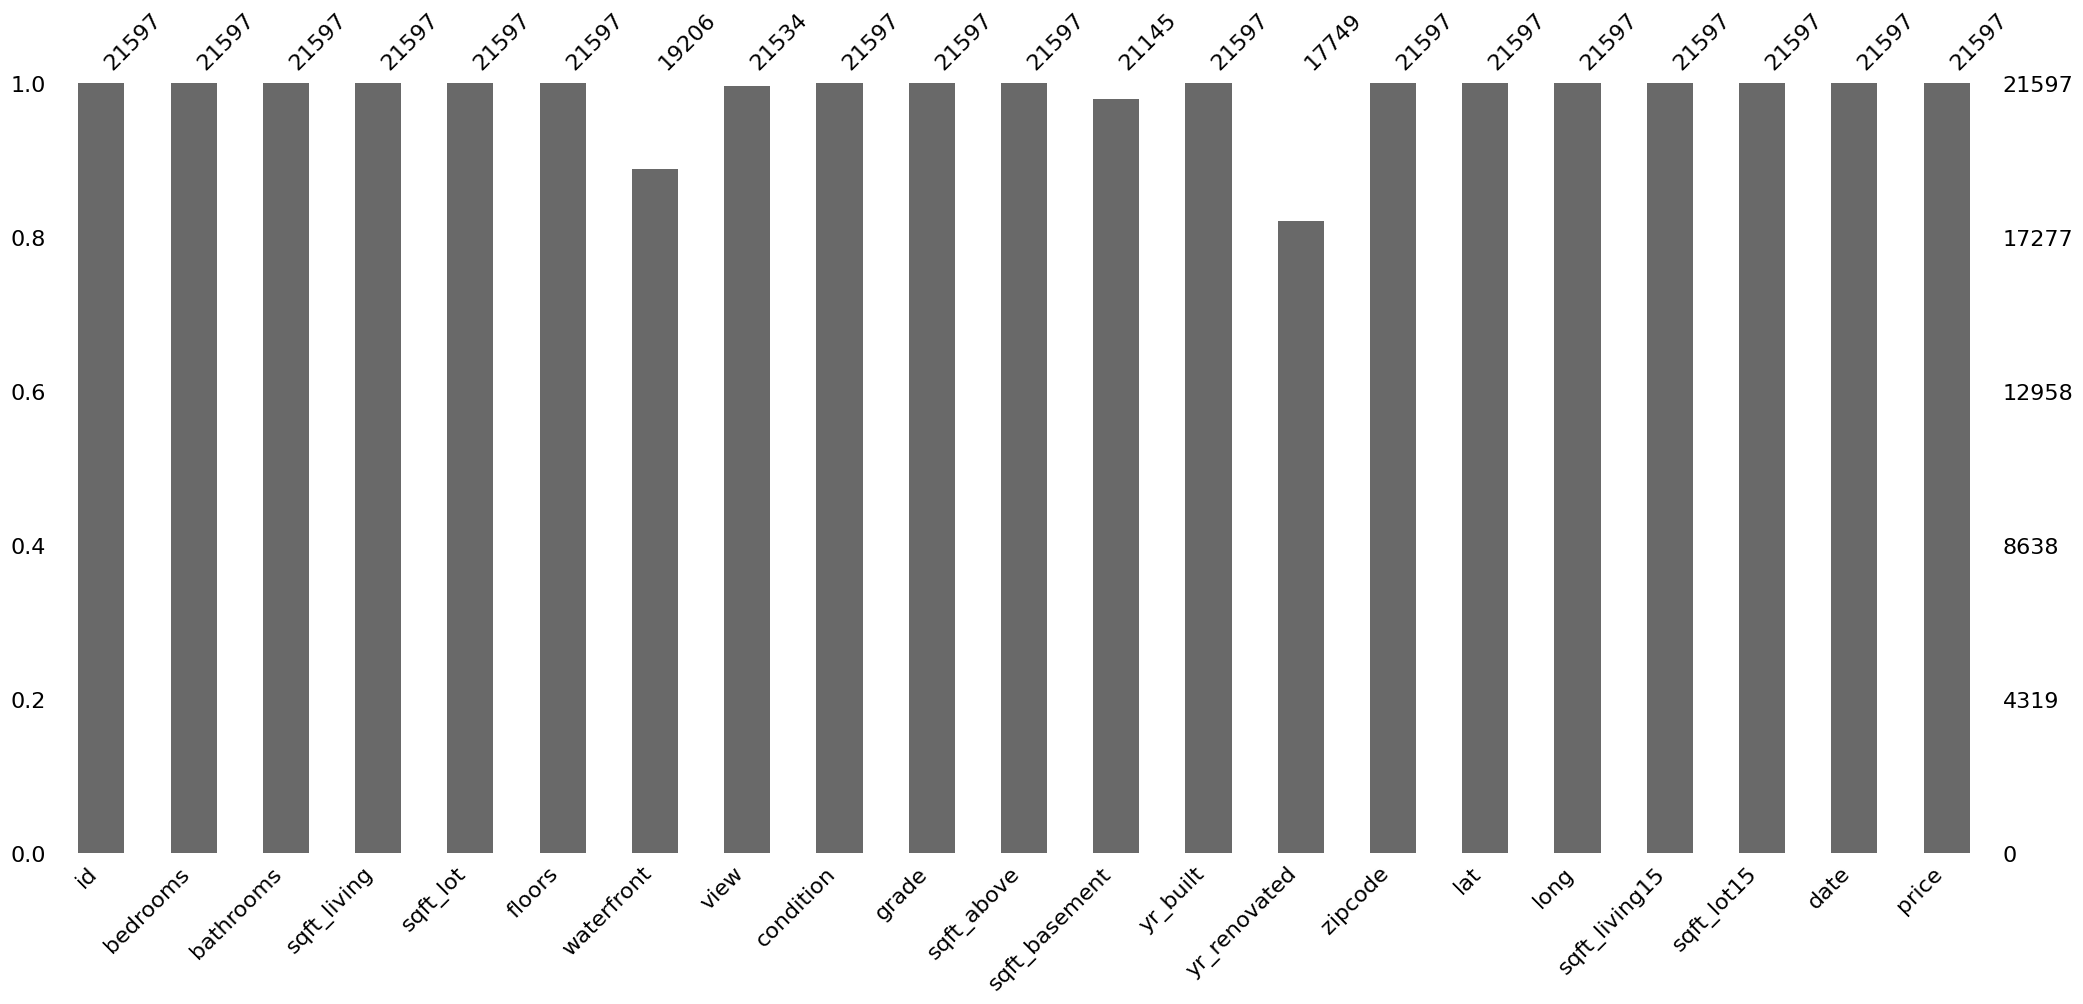

In [ ]:
msno.bar(df_eda)

In [ ]:
print(f"numbers of rows : {df_eda.shape[0]}")
print(f"houses without waterfront : {round(df_eda.waterfront.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"houses without renovation : {round(df_eda.yr_renovated.isna().sum()/df_eda.shape[0]*100,2)} %")
print(f"missing values in data frame : {round(df_eda.isna().sum().sum()/(df_eda.shape[0]*df_eda.shape[1])*100,2)} %")


numbers of rows : 21597
houses without waterfront : 11.07 %
houses without renovation : 17.82 %
missing values in data frame : 1.49 %


In [ ]:
df_eda.replace('NaN', pd.NA, inplace=True)
df_eda.fillna(0, inplace=True)

In [ ]:
# turn yr_renovated into integer 
df_eda['yr_renovated'] = df_eda['yr_renovated'].astype(int)
df_eda.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,...,0.0,1955,0,98178,47.51,-122.26,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,1991,98125,47.72,-122.32,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,0,98028,47.74,-122.23,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0,98136,47.52,-122.39,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0,98074,47.62,-122.04,1800.0,7503.0,2015-02-18,510000.0


## First Hypothesis 
Do all newly renovated houses (within past 10 years) have a good grading (above 10)?

In [ ]:
# Filter houses renovated within past 10 years
renovated_houses_last_10_years = df_eda[(df_eda['yr_renovated'] >= 2014) & (df_eda['yr_renovated'] <= 2024)]
renovated_houses_last_10_years

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
379,7132300695,3.0,1.50,1300.0,3348.0,1.5,0.0,0.0,3,7,...,0.0,1904,2014,98144,47.59,-122.31,1590.0,2577.0,2015-04-21,435000.0
435,2268400350,4.0,2.50,1710.0,9627.0,1.0,0.0,0.0,3,9,...,270.0,1976,2014,98006,47.56,-122.16,2140.0,9131.0,2014-09-16,749000.0
890,1962200435,4.0,1.00,1820.0,5400.0,1.5,0.0,0.0,3,8,...,0.0,1923,2014,98102,47.65,-122.32,1820.0,5400.0,2014-11-10,1010000.0
1377,1453600202,4.0,3.50,2680.0,10000.0,2.0,0.0,0.0,3,8,...,640.0,1942,2014,98125,47.73,-122.30,1530.0,8000.0,2014-05-20,520000.0
1877,3885803625,3.0,1.75,1490.0,3840.0,2.0,0.0,0.0,3,8,...,0.0,1984,2014,98033,47.69,-122.21,3450.0,8500.0,2014-12-03,835000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19159,2420069220,3.0,1.00,1320.0,3954.0,1.5,0.0,0.0,3,6,...,0.0,1912,2014,98022,47.20,-121.99,1270.0,5184.0,2014-12-03,209000.0
19261,2397100705,4.0,4.25,3650.0,5328.0,1.5,0.0,0.0,3,9,...,1320.0,1907,2014,98119,47.64,-122.36,1710.0,3600.0,2014-07-14,1520000.0
19429,582000644,4.0,2.00,1990.0,6000.0,1.0,0.0,0.0,3,9,...,730.0,1956,2015,98199,47.65,-122.40,1770.0,6000.0,2015-05-01,872500.0
19577,421059018,3.0,1.75,1397.0,18000.0,1.0,0.0,0.0,3,7,...,0.0,1965,2014,98092,47.34,-122.17,1950.0,31294.0,2014-11-04,257000.0


In [ ]:
df_filtered_renovated_houses_last_10_years = renovated_houses_last_10_years[['yr_renovated', 'grade']]
df_filtered_renovated_houses_last_10_years

,yr_renovated,grade
379,2014,7
435,2014,9
890,2014,8
1377,2014,8
1877,2014,8
...,...,...
19159,2014,6
19261,2014,9
19429,2015,9
19577,2014,7


In [ ]:
# Compare their grading (above 10 or below)
grade_above_10 = renovated_houses_last_10_years['grade'] > 10
grade_above_10

379      False
435      False
890      False
1377     False
1877     False
         ...  
19159    False
19261    False
19429    False
19577    False
20431    False
Name: grade, Length: 87, dtype: bool

/var/folders/mv/6m38j0cs28b4zwc_3g6h8jkh0000gn/T/ipykernel_32895/791300833.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


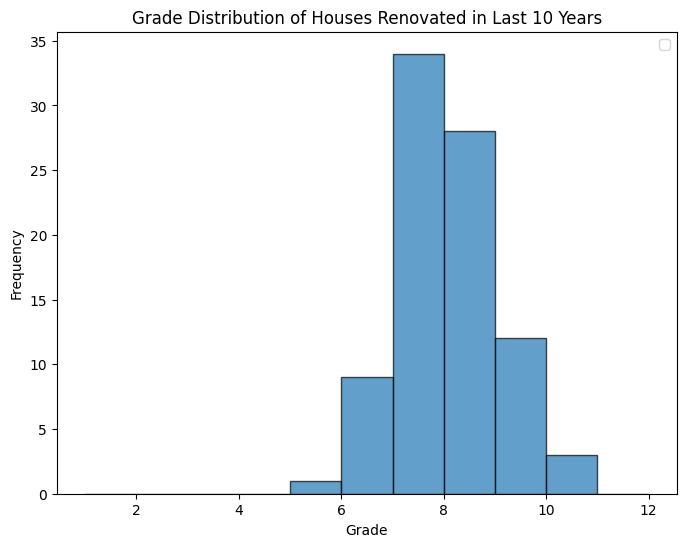

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(renovated_houses_last_10_years['grade'], bins=range(1, 13), edgecolor='black', alpha=0.7)
plt.title('Grade Distribution of Houses Renovated in Last 10 Years')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

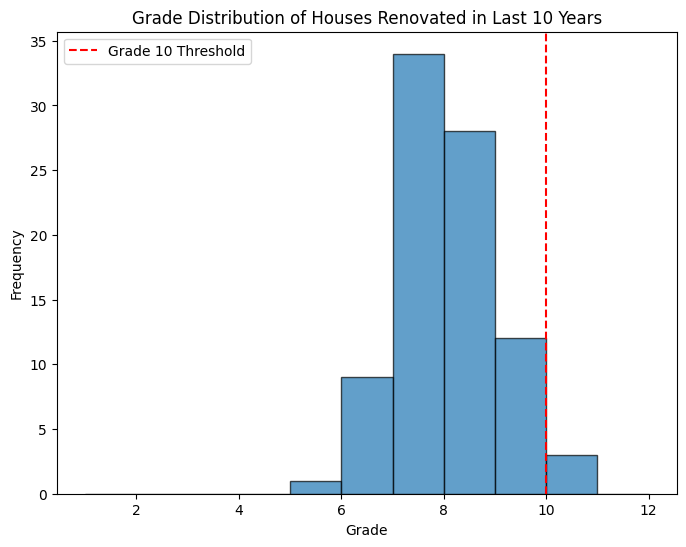

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.hist(renovated_houses_last_10_years['grade'], bins=range(1, 13), edgecolor='black', alpha=0.7)
plt.axvline(x=10, color='red', linestyle='--', label='Grade 10 Threshold')
plt.title('Grade Distribution of Houses Renovated in Last 10 Years')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

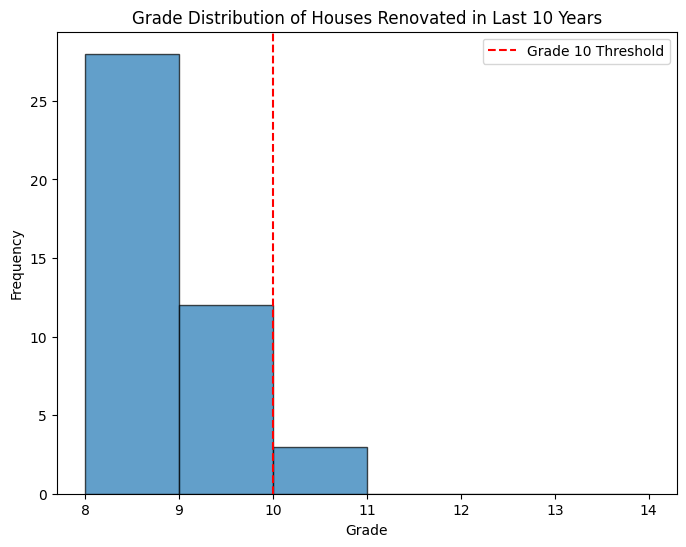

In [ ]:
# Plot the distribution of grades and calculate statistics

plt.figure(figsize=(8, 6))
plt.hist(renovated_houses_last_10_years['grade'], bins=range(8, 15), edgecolor='black', alpha=0.7)
plt.axvline(x=10, color='red', linestyle='--', label='Grade 10 Threshold')
plt.title('Grade Distribution of Houses Renovated in Last 10 Years')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
# Hypothesis check - Are most houses renovated in last 10 years graded above 10?
percentage_above_10 = (grade_above_10.sum() / len(renovated_houses_last_10_years)) * 100
print(f"Percentage of renovated houses (last 10 years) with grade above 10: {percentage_above_10:.2f}%")

if percentage_above_10 < 50:
        print("The hypothesis can't be approved as less than 50% of the houses, renovated within the past 10 years, have a better grading than 10.")
else:
    print("The hypothesis can be validated, as the majority of houses that have been renovated within the last 10 years have a better grade than 10.")

Percentage of renovated houses (last 10 years) with grade above 10: 0.00%
The hypothesis can't be approved as less than 50% of the houses, renovated within the past 10 years, have a better grading than 10.


## Content 

### Various features (columns) influence the target variable (house prices)

- Download 
- Examine the descriptive statistics of the dataset
- Check for missing values 
- Check which features are continuous or categorical
- Understand data (here: Housing conditions in Seattle and surroundings)
- Set up Hypotheses the more the merrier
- Explore data
- Clean data
- Compute correlations etc. 


## Notes /Ideas

- Code to get rid of E... with large numbers 
- prix/sqft in area comparison
-  Zachary Brooks - Sells - Invests in historical houses, best neighborhoods, high profits, best timing within a year, should renovate ? 

    Arguments: 
    - Define historical houses 
    - Define best neighborhoods
        sorted ascending avrg house price per zipcode
        #top 10 best neighborhoods (avrg price) 
        #good_neighborhoods_sorted = good_neighborhoods.sort_values(by='price', ascending=True)
    - Define high profits
    - Define best timing within a year
    - Asks if she should renovate the houses (see grades - might not be that relevant)



    - Clean up data to only have 
        - histrical houses
        - in best neighborhood 

In [ ]:
df_eda.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price
0,7129300520,3.0,1.00,1180.0,5650.0,1.0,0.0,0.0,3,7,...,0.0,1955,0,98178,47.51,-122.26,1340.0,5650.0,2014-10-13,221900.0
1,6414100192,3.0,2.25,2570.0,7242.0,2.0,0.0,0.0,3,7,...,400.0,1951,1991,98125,47.72,-122.32,1690.0,7639.0,2014-12-09,538000.0
2,5631500400,2.0,1.00,770.0,10000.0,1.0,0.0,0.0,3,6,...,0.0,1933,0,98028,47.74,-122.23,2720.0,8062.0,2015-02-25,180000.0
3,2487200875,4.0,3.00,1960.0,5000.0,1.0,0.0,0.0,5,7,...,910.0,1965,0,98136,47.52,-122.39,1360.0,5000.0,2014-12-09,604000.0
4,1954400510,3.0,2.00,1680.0,8080.0,1.0,0.0,0.0,3,8,...,0.0,1987,0,98074,47.62,-122.04,1800.0,7503.0,2015-02-18,510000.0


In [ ]:
df_eda['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [ ]:
# Print full numbers
pd.set_option('display.float_format', '{:.0f}'.format)
# code to revert:  pd.reset_option('display.float_format')

In [ ]:
#Define best neighborhoods.

# Group by zip code and calculate average house price
average_prices = df_eda.groupby('zipcode')['price'].mean().reset_index()

# Define a threshold for "good" neighborhoods
price_threshold = 807000  # Define your own threshold

# Filter for good neighborhoods
good_neighborhoods = average_prices[average_prices['price'] > price_threshold]

# Output results
good_neighborhoods

,zipcode,price
3,98004,1356524
4,98005,810290
5,98006,859939
24,98039,2161300
25,98040,1194874
41,98102,899608
43,98105,863229
47,98109,880078
48,98112,1096239
53,98119,849715


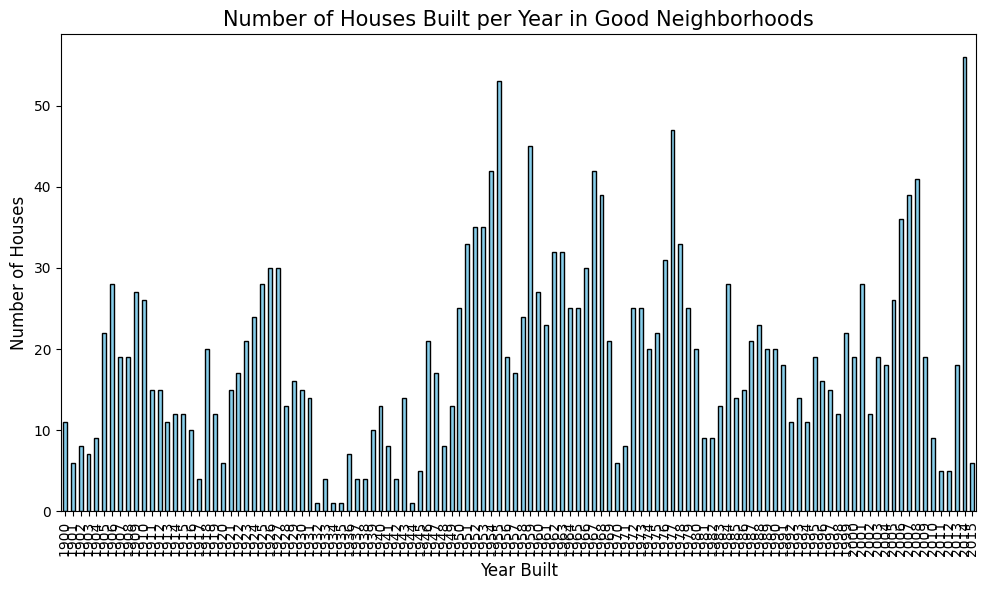

     yr_built  Number of Houses
0        1900                11
1        1901                 6
2        1902                 8
3        1903                 7
4        1904                 9
..        ...               ...
111      2011                 5
112      2012                 5
113      2013                18
114      2014                56
115      2015                 6

[116 rows x 2 columns]


In [ ]:
def good_neighborhoods(df):
    # Define a threshold for "good" neighborhoods
    price_threshold = 807000  # Define your own threshold
    
    # Group by zip code and calculate average house price
    average_prices = df.groupby('zipcode')['price'].mean().reset_index()
    
    # Filter for good neighborhoods
    return average_prices[average_prices['price'] > price_threshold]

# Call the function with df_eda as an argument
good_neighborhoods_df = good_neighborhoods(df_eda)

# Extract the list of ZIP codes from the filtered DataFrame
good_neighborhoods_zipcodes = good_neighborhoods_df['zipcode'].tolist()

# Filter the original DataFrame df_eda to include only rows with these ZIP codes
houses_in_good_neighborhoods = df_eda[df_eda['zipcode'].isin(good_neighborhoods_zipcodes)]

# Group by 'yr_built' to count the number of houses built in each year
houses_built_per_year = houses_in_good_neighborhoods.groupby('yr_built').size()

# Plot the number of houses built per year
plt.figure(figsize=(10, 6))
houses_built_per_year.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Houses Built per Year in Good Neighborhoods', fontsize=15)
plt.xlabel('Year Built', fontsize=12)
plt.ylabel('Number of Houses', fontsize=12)
plt.tight_layout()
plt.show()

# Print the result
print(houses_built_per_year.reset_index(name='Number of Houses'))



In [ ]:
#historical houses
df_eda['yr_built'].describe()
#lower quantile built from 1900 to 1951

count   21597
mean     1971
std        29
min      1900
25%      1951
50%      1975
75%      1997
max      2015
Name: yr_built, dtype: float64

In [ ]:
df_eda['yr_built'].sort_values(ascending=True)

14069    1900
14783    1900
10973    1900
115      1900
4693     1900
         ... 
20235    2015
7519     2015
14911    2015
4150     2015
19789    2015
Name: yr_built, Length: 21597, dtype: int64